In [1]:
import matplotlib.pyplot as plt
import cv2
import json

img_id = "2693_23_3"

## Loading

{'dialog': ["<INFORM hmm that's an excellant idea!>",
  '<INFORM here is the history on all the cases!>'],
 'narration': ['crash describes the plan for baiting the criminals.'],
 'img_id': '2693_23_3',
 'dialog_bounding_boxes': [[76.0, 62.0, 246.0, 130.0],
  [235.0, 59.0, 411.0, 140.0]],
 'narration_bounding_boxes': [[8.0, 10.0, 411.0, 65.0]],
 'face_bounding_boxes': [[58.0, 117.0, 137.0, 224.0],
  [331.0, 160.0, 342.0, 175.0]],
 'error_code': 0}

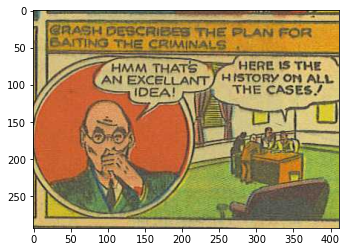

In [2]:
with open("data/data.json", 'r', encoding='utf8') as json_file:
    gt = json.load(json_file)

img = cv2.cvtColor(cv2.imread(img_id + ".jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
img_gt = list(filter(lambda x: x['img_id'] == img_id, gt))[0]
img_gt

In [3]:
def bb_to_plot(bb):
    x1, x2 = bb[0], bb[2]
    y1, y2 = bb[1], bb[3]
    x = [x1, x2, x2, x1, x1]
    y = [y1, y1, y2, y2, y1]
    return x, y

## Dialog

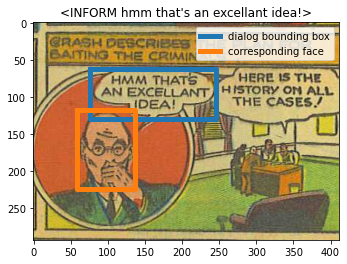

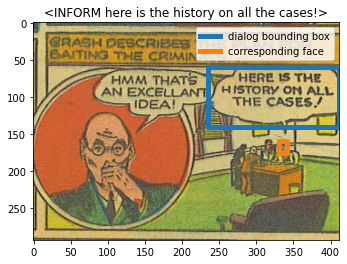

In [4]:
for text, bb, face_bb in zip(img_gt['dialog'], img_gt['dialog_bounding_boxes'], img_gt['face_bounding_boxes']):
    plt.title(text)
    plt.imshow(img)
    x, y = bb_to_plot(bb)
    plt.plot(x, y, linewidth=5)
    x, y = bb_to_plot(face_bb)
    plt.plot(x, y, linewidth=5)
    plt.legend(["dialog bounding box","corresponding face"])
    plt.show()

## Narration

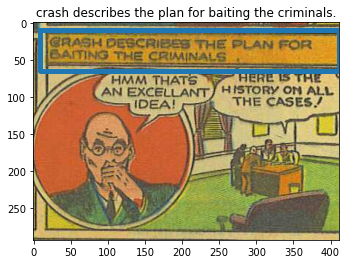

In [5]:
for text, bb in zip(img_gt['narration'], img_gt['narration_bounding_boxes']):
    plt.title(text)
    plt.imshow(img)
    x, y = bb_to_plot(bb)
    plt.plot(x, y, linewidth=5)
    plt.show()